## Import Library

In [ ]:
import seaborn as sns
import io
import pandas as pd               # Untuk tabel data
from scipy import stats           # Untuk statistik
import numpy as np                # Untuk perhitungan matriks dan data
import matplotlib.pyplot as plt   # Untuk menampilkan data
plt.style.use('dark_background')

## Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Housing.csv']))
df.head()

Saving Housing.csv to Housing (4).csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Wrangling

In [ ]:
df 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
# Karena pada regresi menggunakan float, maka data price dan area diubah menjadi float
df['price'] = df['price'].astype('float64')
df['area'] = df['area'].astype('float64')
df.dtypes

price               float64
area                float64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking               int64
prefarea             object
furnishingstatus     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 55.5+ KB


In [ ]:
list(df.columns)

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [ ]:
df.describe

<bound method NDFrame.describe of           price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0    13300000.0  7420.0         4          2        3      yes        no   
1    12250000.0  8960.0         4          4        4      yes        no   
2    12250000.0  9960.0         3          2        2      yes        no   
3    12215000.0  7500.0         4          2        2      yes        no   
4    11410000.0  7420.0         4          1        2      yes       yes   
..          ...     ...       ...        ...      ...      ...       ...   
540   1820000.0  3000.0         2          1        1      yes        no   
541   1767150.0  2400.0         3          1        1       no        no   
542   1750000.0  3620.0         2          1        1      yes        no   
543   1750000.0  2910.0         3          1        1       no        no   
544   1750000.0  3850.0         3          1        2      yes        no   

    basement hotwaterheating airconditioning  parking

In [ ]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000.0,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000.0,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [ ]:
df.tail(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
544,1750000.0,3850.0,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
print(df[['area']].std())

area    2170.141023
dtype: float64


### Data Validation

In [ ]:
x = df.iloc[:,:1]
x.head(7)

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000
5,10850000
6,10150000


In [ ]:
y = df.iloc[:,1]
y.head(7)

0    7420
1    8960
2    9960
3    7500
4    7420
5    7500
6    8580
Name: area, dtype: int64

In [ ]:
y.unique()

array([4, 3, 5, 2, 6, 1])


---


## Exploratory Data Analysis

---



In [ ]:
# describe tabel 
df[['area']].describe()

,area
count,545.000000
mean,5150.541284
std,2170.141023
min,1650.000000
25%,3600.000000
50%,4600.000000
75%,6360.000000
max,16200.000000


### Univariate Analysis

In [ ]:
df.isnull()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,False,False,False,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False,False,False,False,False,False
542,False,False,False,False,False,False,False,False,False,False,False,False,False
543,False,False,False,False,False,False,False,False,False,False,False,False,False


### Bivariate Analysis



---



predict	:
[[10457.21553135]
 [ 9804.24105989]
 [ 9804.24105989]
 [ 9782.47524418]
 [ 9281.86148273]
 [ 8933.60843128]
 [ 8498.29211698]
 [ 8498.29211698]
 [ 8324.16559125]
 [ 8280.63395982]
 [ 8280.63395982]
 [ 8206.63018639]
 [ 7975.91253981]
 [ 7932.38090838]
 [ 7932.38090838]
 [ 7845.31764552]
 [ 7845.31764552]
 [ 7758.25438266]
 [ 7714.72275122]
 [ 7692.95693551]
 [ 7627.65948836]
 [ 7584.12785693]
 [ 7562.36204122]
 [ 7562.36204122]
 [ 7518.83040979]
 [ 7497.06459407]
 [ 7449.1797995 ]
 [ 7410.00133121]
 [ 7410.00133121]
 [ 7410.00133121]
 [ 7410.00133121]
 [ 7410.00133121]
 [ 7344.70388406]
 [ 7279.40643692]
 [ 7235.87480549]
 [ 7211.58415515]
 [ 7187.99001091]
 [ 7148.81154263]
 [ 7137.92863477]
 [ 7105.2799112 ]
 [ 7083.51409548]
 [ 7061.74827977]
 [ 6974.6850169 ]
 [ 6974.6850169 ]
 [ 6887.62175404]
 [ 6887.62175404]
 [ 6865.85593833]
 [ 6844.09012261]
 [ 6822.3243069 ]
 [ 6800.55849118]
 [ 6800.55849118]
 [ 6800.55849118]
 [ 6757.02685975]
 [ 6757.02685975]
 [ 6757.02685975]


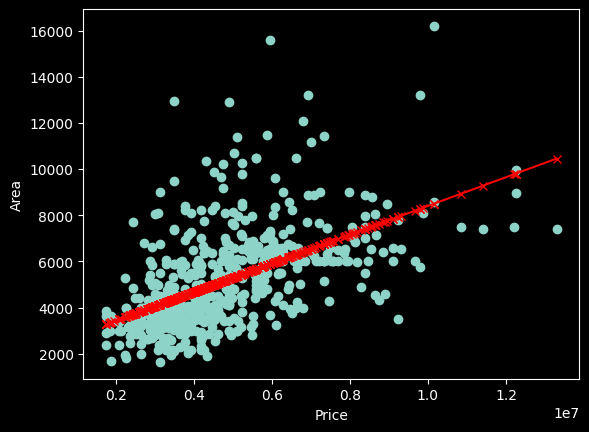

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df = pd.read_csv('Housing.csv')
# separate fitur dan lable
X = df.iloc[:,0:1].values
y = df.iloc[:,1].values

# Choose Model Type and put into Training Data
model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# Test Prediction
P = model.predict(X.reshape(-1, 1))
print(f"predict\t:")
print(f"{P}\n")

print(f"theta_0\t: {model.intercept_}")
print(f"theta_1\t: {model.coef_}")
print(f"RMSE\t: {np.sqrt(mean_squared_error(P, y.reshape(-1, 1)))}")

# # RMSE 
# rmse = mean_squared_error(y_pred, squared=False)

# Show with Graphic
plt.scatter(X, y)
plt.plot(X, P.reshape(1, -1)[0], marker='x', color='red')
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()



---



### Kesimpulan EDA

Pemahaman terhadap library Scikit-learn dan Matplotlib sangat penting dalam membangun model machine learning dari data CSV. Dengan memahami konsep dasar  pembuatan model dan penggunaan library ini,lebih mudah memahami model yang akurat dan efektif dalam menyelesaikan berbagai masalah machine learning

## Model Creation



---


Lebih baik menggunakan angka data yang tersedia dan memiliki lebih dari 2 kolom yang berisi angka untuk menjadikan  perbandingan untuk membuktikan kevalidan data tersebut.

### Definisi Regresi Linear Anda

Menurut saya regresi linear hubungan antar satu atau lebih variabel untuk mempresentasikan hubungan antar variabel dan menghasilkan nilai.

### Asumsi Regresi Linear

Untuk mendapat regresi yang terbaik, lebih baik selalu mengulang kesalahan dan memprediksikan nilai tersebut

### Makna Rumus Regresi Linear OLS

menemukan nilai kofiesien terhadap prediksi nilai persamaan x, y

### Feature Selection & Engineering

meningkatkan suatu variabel yang relevan dalam sebuat model yang kompleks

### Model Fitting, Creation, and Visualization

proses yang penting untuk membuat model yang akurat, tervalidasi, dan teruji untuk dapat memprediksikan sebuah data

## Model Testing

Model yang saya gunakan biasa saja dan kurang dimengerti



---
# TUGAS 2


---






